Data shapes:
train_x shape: (100, 1000)
test_x shape: (100, 200)
train_y shape: (1, 1000)
test_y shape: (1, 200)

Training the model...
Cost at iteration 0: 0.693147
Cost at iteration 100: 0.596167
Cost at iteration 200: 0.567866
Cost at iteration 300: 0.541465
Cost at iteration 400: 0.516836
Cost at iteration 500: 0.493856
Cost at iteration 600: 0.472406
Cost at iteration 700: 0.452373
Cost at iteration 800: 0.433652
Cost at iteration 900: 0.416143
Cost at iteration 1000: 0.399753
Cost at iteration 1100: 0.384398
Cost at iteration 1200: 0.369997
Cost at iteration 1300: 0.356478
Cost at iteration 1400: 0.343774

Final Results:
Train accuracy: 99.80%
Test accuracy: 98.50%


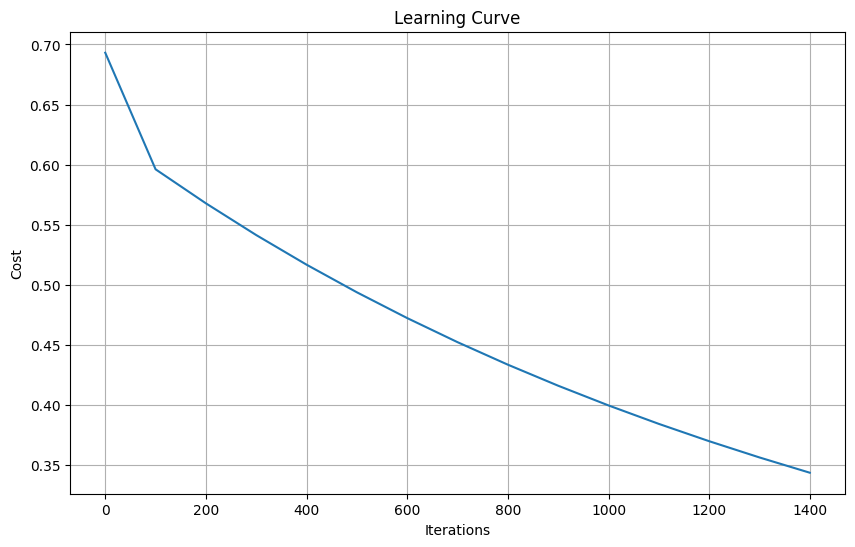

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
m_train, m_test = 1000, 200
num_features = 100

# Create training data
class1_train = np.random.normal(0.7, 0.3, (num_features, m_train // 2))
class2_train = np.random.normal(0.3, 0.3, (num_features, m_train // 2))
train_x = np.hstack([class1_train, class2_train])

# Create test data
class1_test = np.random.normal(0.7, 0.3, (num_features, m_test // 2))
class2_test = np.random.normal(0.3, 0.3, (num_features, m_test // 2))
test_x = np.hstack([class1_test, class2_test])

# Create labels and reshape to (1, m)
train_y = np.hstack([np.ones(m_train // 2), np.zeros(m_train // 2)]).reshape(1, -1)
test_y = np.hstack([np.ones(m_test // 2), np.zeros(m_test // 2)]).reshape(1, -1)

print("Data shapes:")
print(f"train_x shape: {train_x.shape}")
print(f"test_x shape: {test_x.shape}")
print(f"train_y shape: {train_y.shape}")
print(f"test_y shape: {test_y.shape}\n")

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model(X, Y, X_test, Y_test, learning_rate=0.01, iterations=1500):
    w = np.zeros((X.shape[0], 1))
    b = 0
    m = X.shape[1]
    costs = []

    for i in range(iterations):
        # Forward propagation
        Z = np.dot(w.T, X) + b
        A = sigmoid(Z)

        # Cost
        cost = -(1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

        # Backward propagation
        dw = (1/m) * np.dot(X, (A - Y).T)
        db = (1/m) * np.sum(A - Y)

        # Update
        w -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            print(f"Cost at iteration {i}: {cost:.6f}")

    # Predictions
    train_pred = (sigmoid(np.dot(w.T, X) + b) > 0.5).astype(int)
    test_pred = (sigmoid(np.dot(w.T, X_test) + b) > 0.5).astype(int)

    train_accuracy = accuracy_score(Y.flatten(), train_pred.flatten())
    test_accuracy = accuracy_score(Y_test.flatten(), test_pred.flatten())

    print("\nFinal Results:")
    print(f"Train accuracy: {train_accuracy * 100:.2f}%")
    print(f"Test accuracy: {test_accuracy * 100:.2f}%")

    return {"w": w, "b": b, "costs": costs,
            "train_accuracy": train_accuracy,
            "test_accuracy": test_accuracy}

# Train model
print("Training the model...")
results = model(train_x, train_y, test_x, test_y)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(range(0, 1500, 100), results["costs"])
plt.title("Learning Curve")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()
